In [2]:
import urllib.request
from bs4 import BeautifulSoup
url = "https://www.x-rates.com/table/?from=USD&amount=1"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

In [3]:
# View the RAW HTML
print(soup.title.string)
print("-------------------")
print(soup.prettify())

Currency Exchange Table (US Dollar - USD) - X-Rates
-------------------
<!DOCTYPE html>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="This currency rates table lets you compare an amount in US Dollar to all other currencies." name="description"/>
  <meta content="USD EUR, currency exchange table, exchange rate table, convert, euro, american dollar, british pound, canadian dollar, australian dollar, x-rates" name="keywords"/>
  <link href="https://www.x-rates.com/table/?from=USD&amp;amount=1" rel="canonical"/>
  <script type="text/javascript">
   var e9AdSlots  = { 
				  output_lb : {site:'ExchangeRates', adSpace:'Homepage', size:'728x90,468x60', noAd: '1'},
output_rs : {site:'ExchangeRates', adSpace:'Homepage', size:'300x250,300x600,160x600', noAd: '1'},
ros_ls : {site:'XEInternal', adSpace:'HRROS', size:'300x250', rsize: '238x230', noAd: '1', async: false},
ros_ms : {site

In [4]:
table = soup.findAll('table')[1]
print("Isolated Table HTML\n" + "--------------------\n" + table.prettify() + "\n")

Isolated Table HTML
--------------------
<table cellpadding="0" cellspacing="0" class="tablesorter ratesTable">
 <thead>
  <tr>
   <th class="rtHeader rtHeaderCurr">
    US Dollar
   </th>
   <th class="rtHeader rtHeaderValues">
    1.00 USD
   </th>
   <th class="rtHeader rtHeaderValues">
    inv. 1.00 USD
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    Argentine Peso
   </td>
   <td class="rtRates">
    <a href="https://www.x-rates.com/graph/?from=USD&amp;to=ARS">
     114.086499
    </a>
   </td>
   <td class="rtRates">
    <a href="https://www.x-rates.com/graph/?from=ARS&amp;to=USD">
     0.008765
    </a>
   </td>
  </tr>
  <tr>
   <td>
    Australian Dollar
   </td>
   <td class="rtRates">
    <a href="https://www.x-rates.com/graph/?from=USD&amp;to=AUD">
     1.357505
    </a>
   </td>
   <td class="rtRates">
    <a href="https://www.x-rates.com/graph/?from=AUD&amp;to=USD">
     0.736645
    </a>
   </td>
  </tr>
  <tr>
   <td>
    Bahraini Dinar
   </td>
   <td class="rtR

In [5]:
A = []
B = []
C = []

for row in table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells) > 0:
        print(cells[1].find('a').find(text=True))
        A.append(cells[0].find(text=True))
        B.append(cells[1].find('a').find(text=True))
        C.append(cells[2].find('a').find(text=True))


114.086499
1.357505
0.376000
11.624923
4.622943
1.363955
1.803622
1.256935
824.161545
6.451050
3773.772471
6.974150
22.476112
6.861952
0.922177
7.844908
341.372161
128.184291
76.268193
14374.424182
42354.335190
3.243424
128.291671
443.719152
1244.202000
0.305275
4.719421
4.290333
43.014234
20.180462
122.086309
1.485657
8.886974
0.384500
187.045622
52.398565
4.282097
3.640000
4.559432
80.763220
3.750000
1.363955
15.416914
334.989829
9.505832
0.953391
29.299925
33.897493
6.793744
14.710302
3.672500
0.767628
443872.814552


In [6]:
import pandas as pd
df = pd.DataFrame(A,columns=['Currency_Name'])
df['Exchange_Rate'] = B
df['Investment_Rate'] = C

In [7]:
df

,Currency_Name,Exchange_Rate,Investment_Rate
0,Argentine Peso,114.086499,0.008765
1,Australian Dollar,1.357505,0.736645
2,Bahraini Dinar,0.376000,2.659574
3,Botswana Pula,11.624923,0.086022
4,Brazilian Real,4.622943,0.216312
5,Bruneian Dollar,1.363955,0.733162
6,Bulgarian Lev,1.803622,0.554440
7,Canadian Dollar,1.256935,0.795586
8,Chilean Peso,824.161545,0.001213
9,Chinese Yuan Renminbi,6.451050,0.155014


In [8]:
df.to_csv('CSC221-webscrape-data.csv')

<h3>Checkpoint 2 - Start</h3><font color="red">James Diller</font>
<p>Looking at the dataframe, using seperate sets of bar graphs for the Exchange Rate and the Investment Rate makes the most sense - there's no real connection between currencies to justify a line graph, scatter plot would be too hard to read. Having Exchange Rate and Investment Rates displayed as seperate makes sense as well, since they measure very seperate things.</p>

In [4]:
# Making a new dataframe from the sorted Exchange rate values. As the exchange rates vary by over
# a factor of a million, it makes little sense to try to display all of them on a single graph.
# As such, this helps figure out how to divide them up.

# Also, I need to convert the values in the Dataframe from strings to float

# Doing a second pandas import so I can run the Notebook from this Checkpoint, rather than from the beginning.
import pandas as pd

df = pd.read_csv('CSC221-webscrape-data.csv')

df['Exchange_Rate'] = df['Exchange_Rate'].astype(float)
df['Investment_Rate'] = df['Investment_Rate'].astype(float)

df = df.sort_values(by=['Exchange_Rate'], ascending=False)

df.reset_index(drop=True, inplace=True)

df

,Unnamed: 0,Currency_Name,Exchange_Rate,Investment_Rate
0,52,Venezuelan Bolivar,443195.022327,0.000002
1,20,Iranian Rial,42025.273769,0.000024
2,19,Indonesian Rupiah,14384.704654,0.000070
3,10,Colombian Peso,3852.989213,0.000260
4,24,South Korean Won,1245.140857,0.000803
5,8,Chilean Peso,837.319240,0.001194
6,23,Kazakhstani Tenge,443.883340,0.002253
7,16,Hungarian Forint,344.470625,0.002903
8,43,Sri Lankan Rupee,320.343000,0.003122
9,34,Pakistani Rupee,187.613169,0.005330


In [5]:
# Very likely, I'll be doing exchange subplots divided up by order of magnitude, with the last (smallest) bar
# of the current subplot is also the first (largest) bar of the next subplot, this is to help compare wildly
# different exchange rates, without making the smaller rates impossible to see.

magnitude_index = [0]
current_ex = df['Exchange_Rate'][0]

for ex_rate in df.iterrows():
    if ex_rate[1]['Exchange_Rate'] < (current_ex / 10):
        magnitude_index.append(ex_rate[0])
        current_ex = ex_rate[1]['Exchange_Rate']
        
magnitude_index

[0, 1, 3, 7, 18, 40, 52]

Exchange Rates Compared to the Dollar part 1 of 6


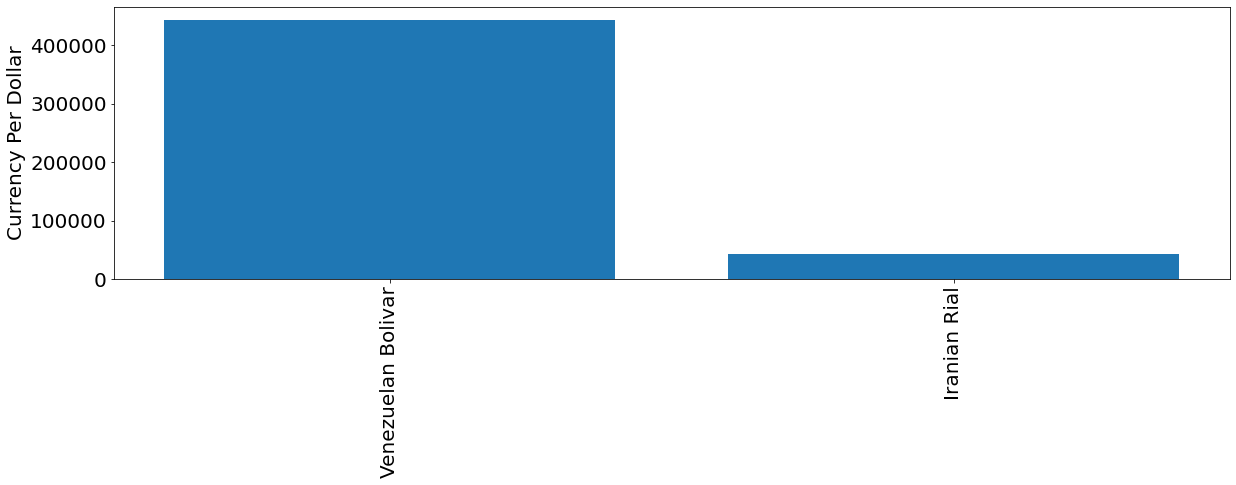

Exchange Rates Compared to the Dollar part 2 of 6


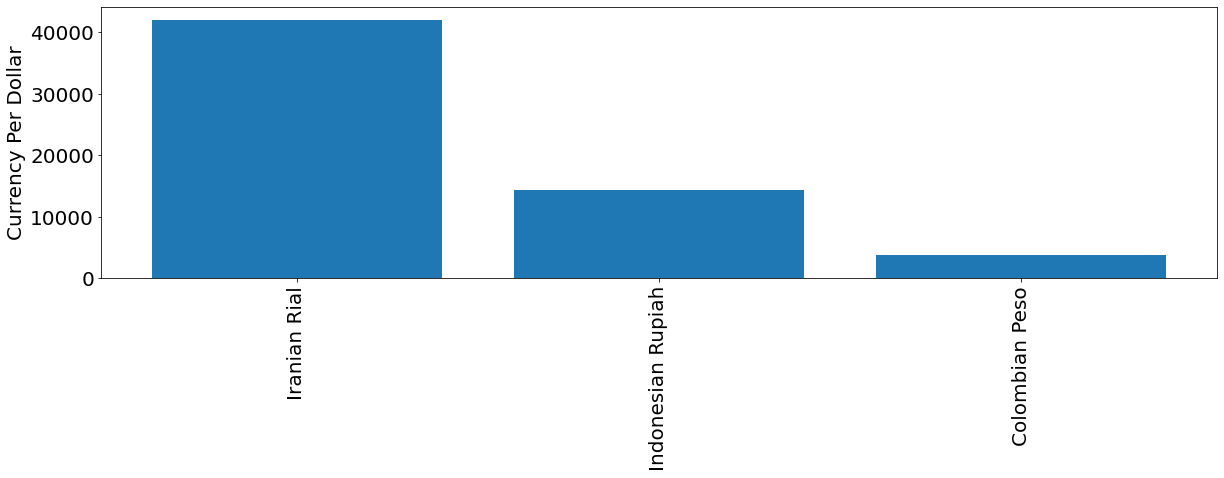

Exchange Rates Compared to the Dollar part 3 of 6


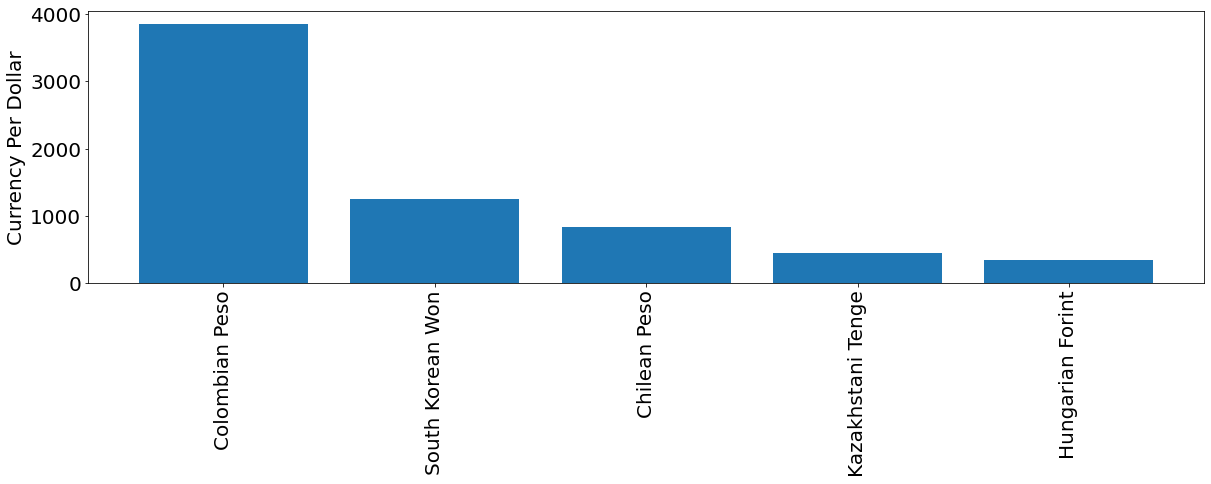

Exchange Rates Compared to the Dollar part 4 of 6


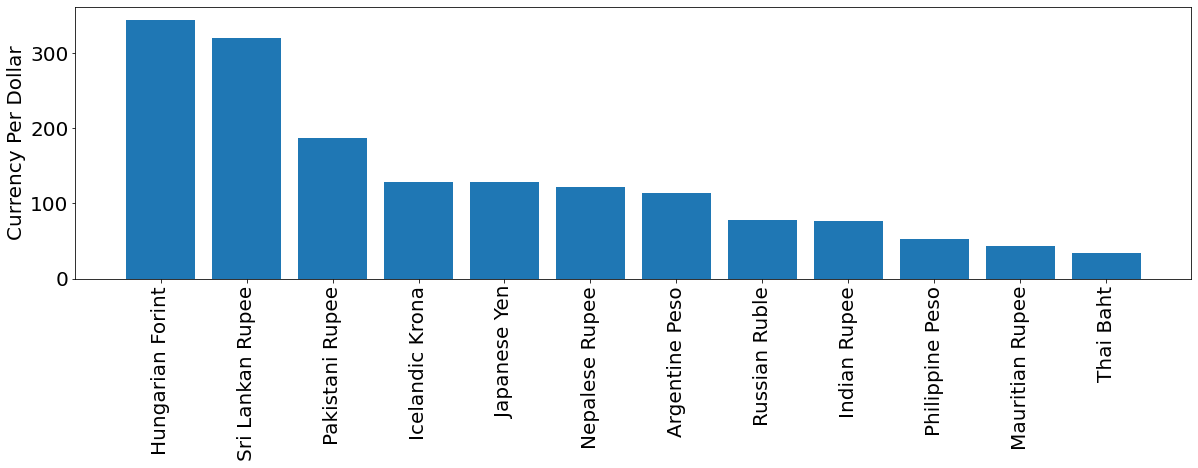

Exchange Rates Compared to the Dollar part 5 of 6


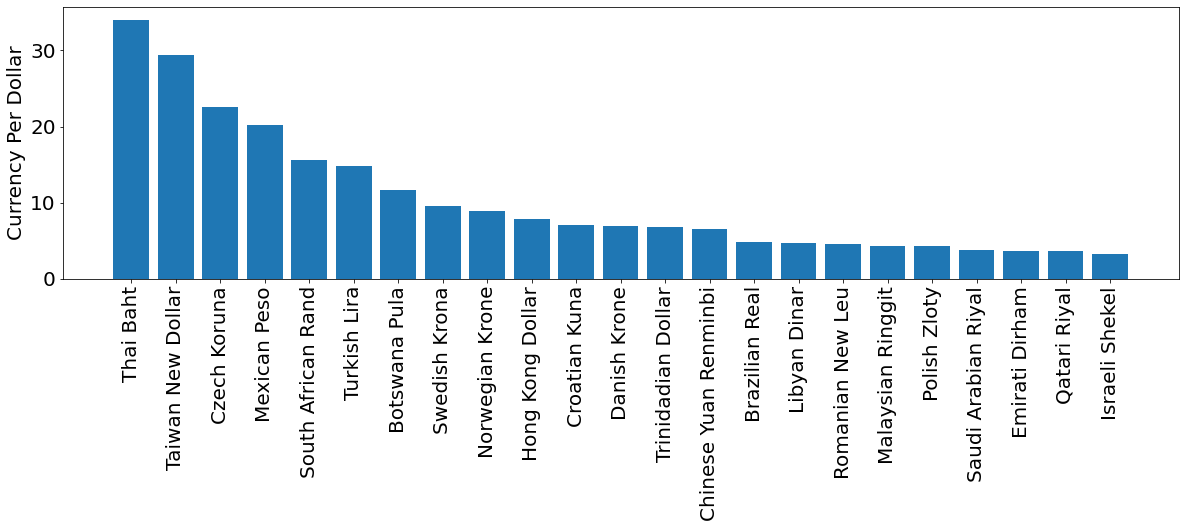

Exchange Rates Compared to the Dollar part 6 of 6


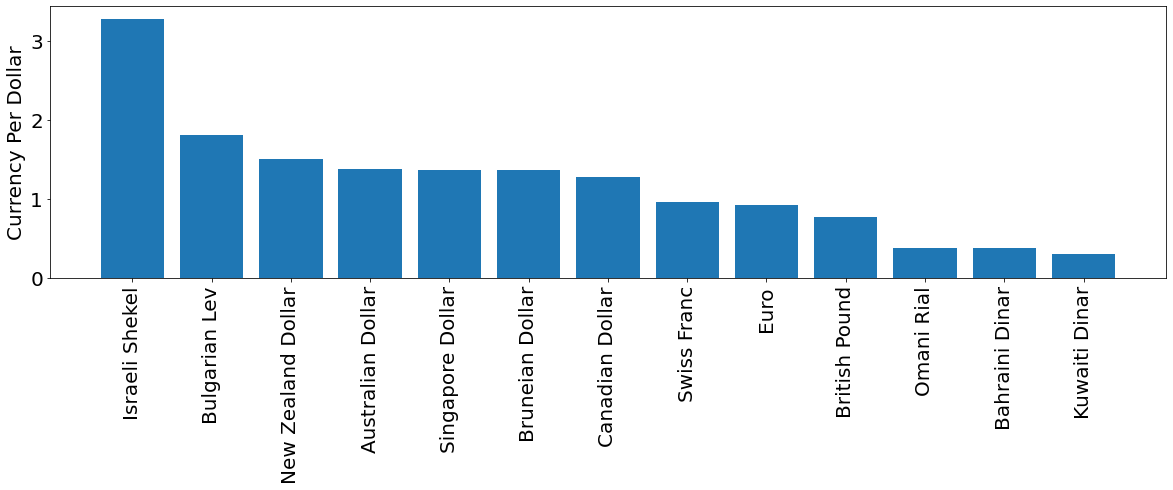

In [6]:
# Standard Import

import numpy as np
from matplotlib import pyplot as plt

# Setting up the figure

x_size = 20
y_size = 5

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
#plt.rc('figure', titlesize=60)

# Would have greatly preferred to use subplots, but I had trouble with them displaying correctly.

for index in range(len(magnitude_index)-1):
    fig = plt.figure(figsize=(x_size, y_size))
    #plt.title("Exchange Rates Compared to the Dollar part " + str(index+1) + " of " + str(len(magnitude_index)-1))
    num_curr = magnitude_index[index+1]-magnitude_index[index]+1
    plt.bar(range(num_curr), df.loc[magnitude_index[index]:magnitude_index[index+1]]['Exchange_Rate'])
    plt.xticks(range(num_curr), df.loc[magnitude_index[index]:magnitude_index[index+1]]['Currency_Name'], rotation=90)
    plt.ylabel('Currency Per Dollar')
    print("Exchange Rates Compared to the Dollar part", index+1, "of", len(magnitude_index)-1)
    plt.show()

In [7]:
# Resetting DF back to Alphabetical Order. Perhaps I should've just left it alone, or do the Inverse Rate
# first? Unlike the exchange rates, I do not feel as much need to sort them - there's actually similar
# information here, although I'd expect rounding errors for the high exchange rate currencies.

df = df.sort_values(by=['Currency_Name'])

df.reset_index(drop=True, inplace=True)

df

,Unnamed: 0,Currency_Name,Exchange_Rate,Investment_Rate
0,0,Argentine Peso,114.123149,0.008762
1,1,Australian Dollar,1.379973,0.724652
2,2,Bahraini Dinar,0.376000,2.659574
3,3,Botswana Pula,11.624456,0.086026
4,4,Brazilian Real,4.797855,0.208426
5,51,British Pound,0.778427,1.284642
6,5,Bruneian Dollar,1.371181,0.729298
7,6,Bulgarian Lev,1.811055,0.552164
8,7,Canadian Dollar,1.273005,0.785543
9,8,Chilean Peso,837.319240,0.001194


Inverse Exchange Rate - 1 Unit of Currency Yield This Many Dollars, part 1 of 4


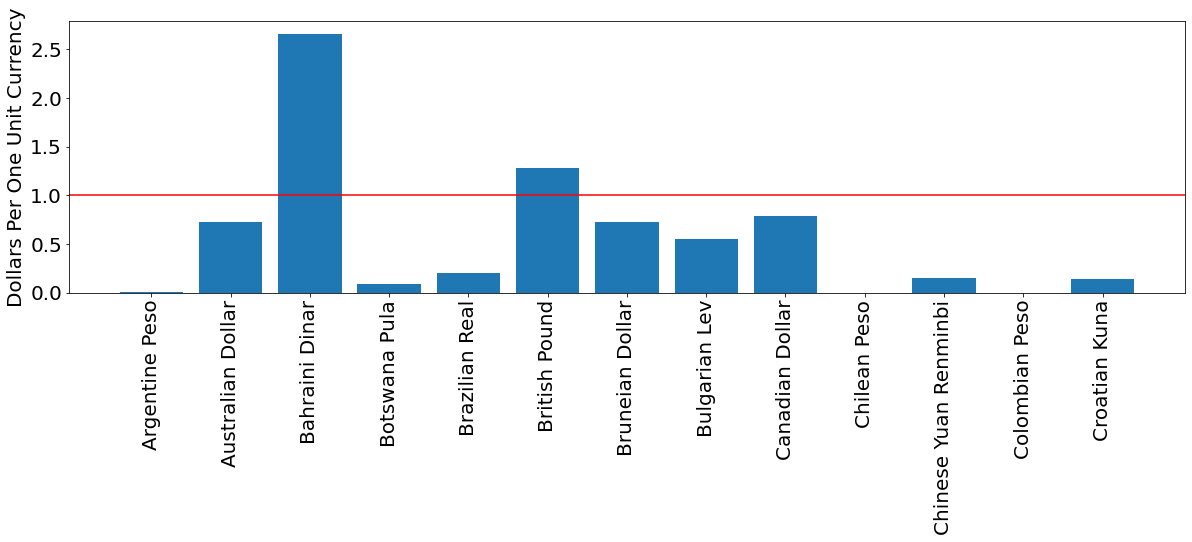

Inverse Exchange Rate - 1 Unit of Currency Yield This Many Dollars, part 2 of 4


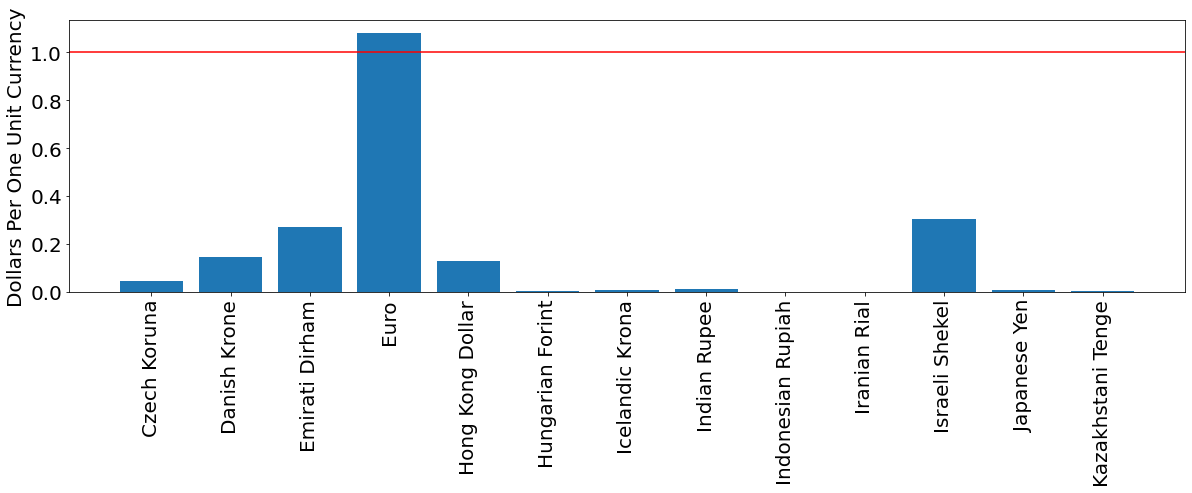

Inverse Exchange Rate - 1 Unit of Currency Yield This Many Dollars, part 3 of 4


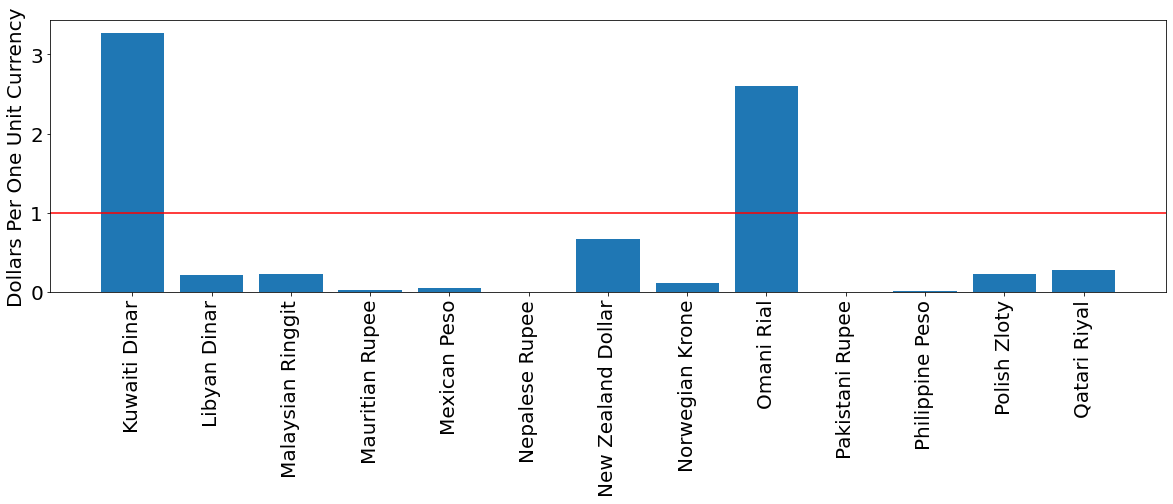

Inverse Exchange Rate - 1 Unit of Currency Yield This Many Dollars, part 4 of 4


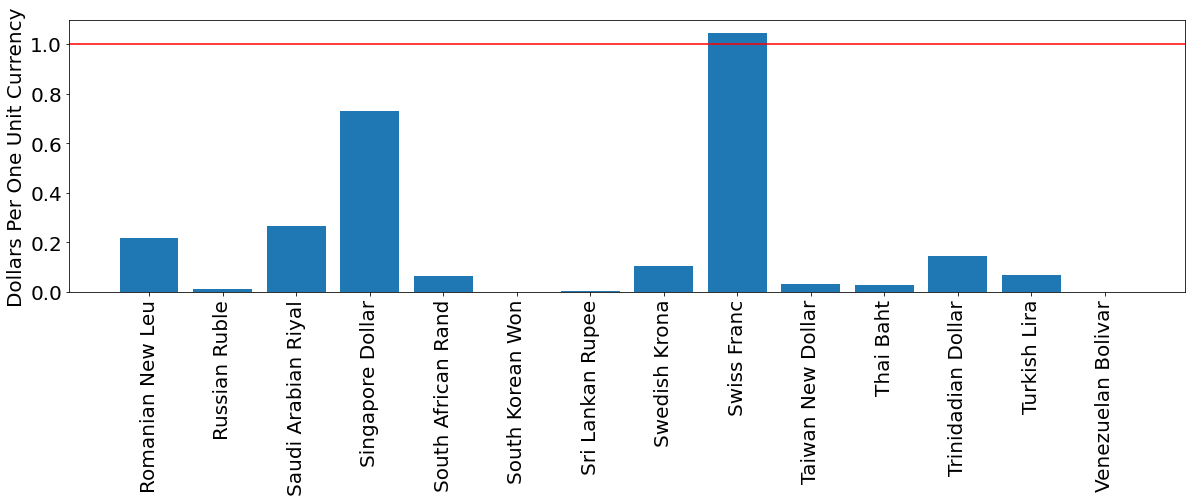

In [8]:
# Here, I decided to divide it into four nearly equal size graphs. There's a red line at Investment Rate = 1
# To help compare different graphs to each other. There's the odd currency here and there that's almost at zero
# but unlike the previous graphs, I do not feel the need to show exactly how different those are - there's
# a bit of inaccuracy thanks to rounding anway.

for i in range(4):
    fig = plt.figure(figsize=(x_size, y_size))
    if i < 3:
        endpoint = ((i+1)*13)-1
        x_ranger = 13
    else:
        endpoint = ((i+1)*13)
        x_ranger = 14
    plt.bar(range(x_ranger), df.loc[(i*13):endpoint]['Investment_Rate'])
    plt.xticks(range(x_ranger), df.loc[(i*13):endpoint]['Currency_Name'], rotation=90)
    plt.ylabel('Dollars Per One Unit Currency')
    plt.axhline(1, color='red')
    
    print("Inverse Exchange Rate - 1 Unit of Currency Yield This Many Dollars, part", str(i+1), "of 4")
    plt.show()